In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 14.0) # 设置figure_size尺寸

In [2]:
link = pd.read_csv("linkCoordinates.csv")

In [3]:
link.head()

,LinkRef,LinkDescription,StartJunction,EndJunction,StartX,StartY,EndX,EndY
0,AL1000,A38 between A513 and A5127 (AL1000),A513,A5127,417216.0,314346.0,414414.0,310549.0
1,AL1001,A38 between A5127 and A513 (AL1001),A5127,A513,414399.0,310543.0,417204.0,314350.0
2,AL1004,A38 between A513 and A5121 (AL1004),A513,A5121,417204.0,314350.0,421987.0,321236.0
3,AL1007,A38 between A5121 and A513 (AL1007),A5121,A513,422031.0,321346.0,417216.0,314346.0
4,AL1012,A42 between A511 and M42 J11 (AL1012),A511,M42 J11,437463.0,317050.0,430734.0,310772.0


In [4]:
link.shape

(2510, 8)

In [5]:
link['LinkRef'].nunique()

2510

In [6]:
link.dropna(inplace=True)

In [7]:
link['xCenter'] = (link['StartX'] + link['EndX'])/2
link['yCenter'] = (link['StartY'] + link['EndY'])/2

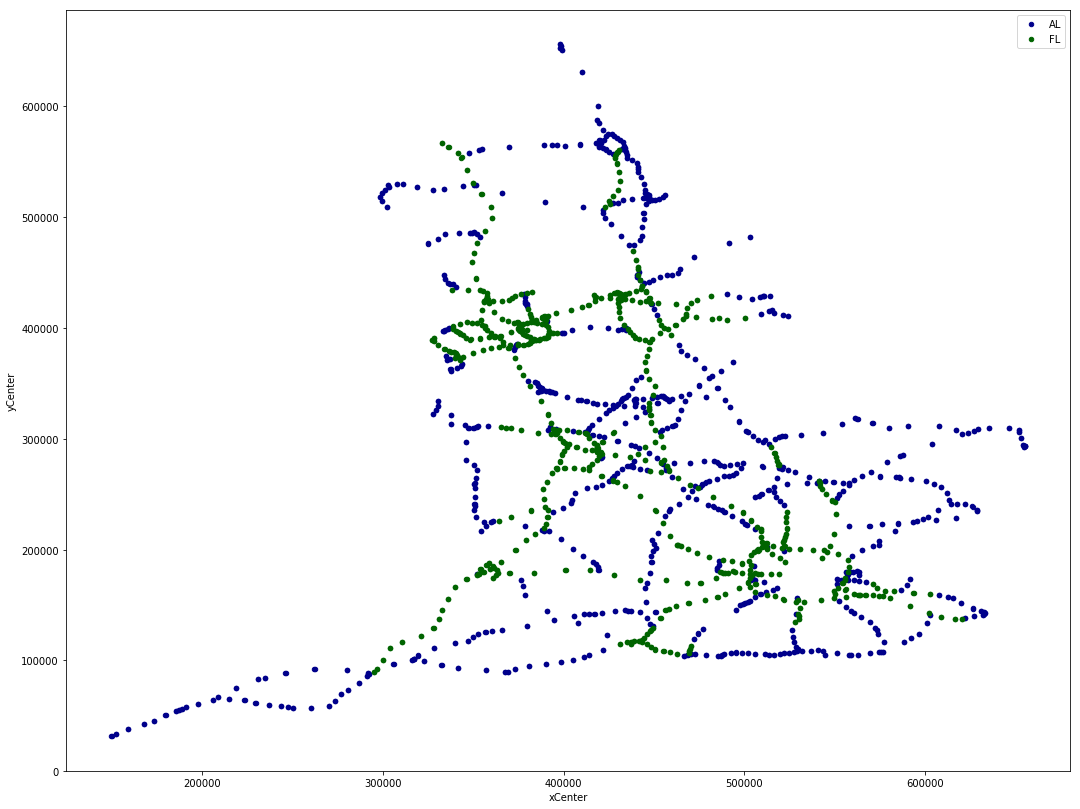

In [30]:
# link['isAL'] = link['LinkRef'].str.contains("AL")

# ax = link[link['isAL']==True].plot.scatter(x = 'xCenter', y = 'yCenter', color='DarkBlue', label='AL');
# link[link['isAL']==False].plot.scatter(x = 'xCenter', y = 'yCenter', color='DarkGreen', label='FL', ax=ax);

In [9]:
# link.plot.scatter(x = 'xCenter', y = 'yCenter')

In [36]:
null_point = ['AL1352', 'AL1353', 'AL1380A', 'AL1381A', 'AL2567', 'AL2568', 'AL2572', 'AL257A', 'AL2739', 'AL2740', 'AL320A', 'AL3510', 'LM1048A', 'LM1511', 'LM1512', 'LM153', 'LM154', 'LM316', 'LM382', 'LM514', 'LM631A', 'LM796', 'LM797', 'LM962', 'LM963']
null_point = null_point+['LM100', 'LM99']

In [11]:
x_up = 630000
x_bottom = 411500
y_up = 307800
y_bottom = 80000

london_link = link[(link['xCenter']>x_bottom) & (link['xCenter']<x_up) & (link['yCenter']<y_up) & (link['yCenter']>y_bottom)]
london_link[~london_link['LinkRef'].isin(null_point)].shape

(1024, 10)

In [12]:
london_link = london_link[~london_link['LinkRef'].isin(null_point)]

ValueError: scatter requires x column to be numeric

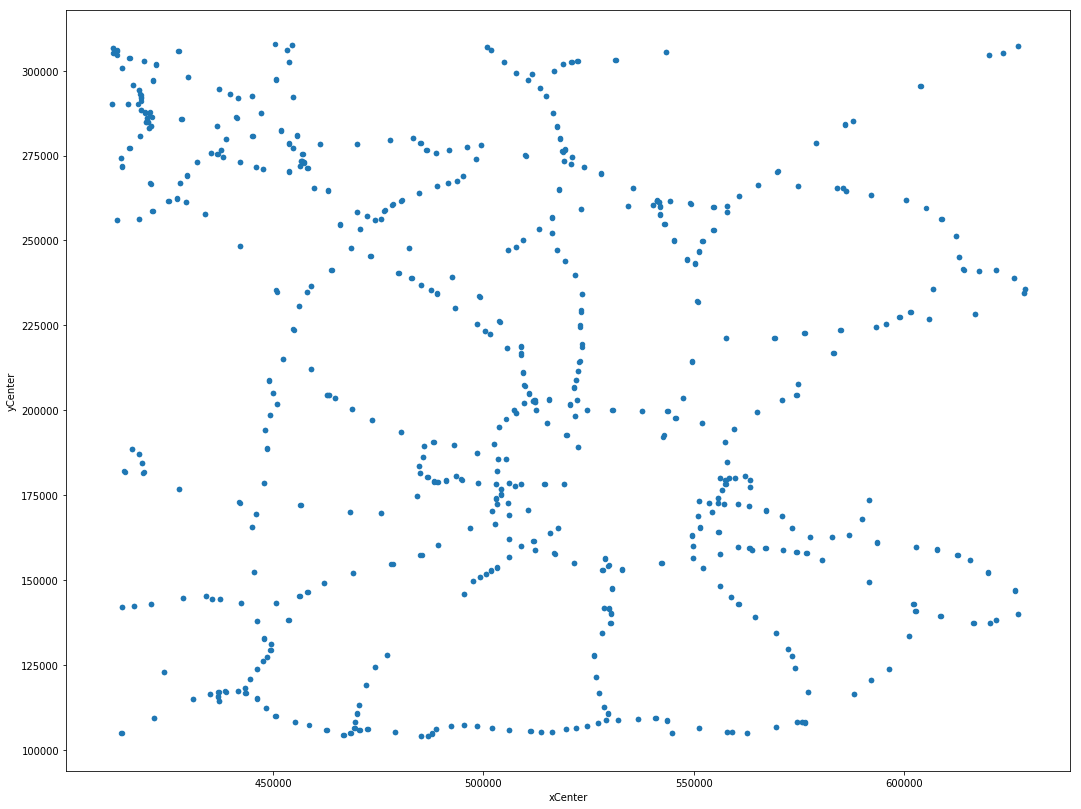

In [33]:
ax = london_link.plot.scatter(x = 'xCenter', y = 'yCenter')
london_link[london_link['LinkRef'].isin(null_point)].plot.scatter(x = 'xCenter', y = 'yCenter', s=250, c='black', ax=ax)

In [14]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=16, random_state=0).fit(london_link[['xCenter','yCenter']])
# london_link['cluster'] = kmeans.predict(london_link[['xCenter','yCenter']])

# cluster_point = kmeans.cluster_centers_

# # sns.lmplot('xCenter', 'yCenter', data=london_link, hue='cluster', fit_reg=False, scatter_kws={"s": 30, "alpha": 1})
# color_list = ['darkcyan', 'DarkGreen', 'darkred', 'darkgoldenrod', 'darkgray', 'darkkhaki', 'darkmagenta','darkorange','darkorchid','darksalmon','darkseagreen','darkslateblue','darkslategray','darkturquoise','darkviolet']

# ax = london_link[london_link['cluster']==0].plot.scatter(x = 'xCenter', y = 'yCenter', color='DarkBlue', label='0');
# for i in range(1, 16):
#     london_link[london_link['cluster']==i].plot.scatter(x = 'xCenter', y = 'yCenter', color=color_list[i-1], label=i , ax=ax)
#     print(london_link[london_link['cluster']==i].shape)
    
# for i in range(16):
#     plt.scatter(x=cluster_point[i][0], y=cluster_point[i][1], s=50, c='black')
#     plt.annotate(i, (cluster_point[i][0]+100,cluster_point[i][1]+100),zorder=99999,fontsize=16)


In [15]:
matrix_constructor = london_link.sort_values(by='yCenter', ascending=False)
matrix_constructor['xCoordinate'] = 0
matrix_constructor['yCoordinate'] = 0
matrix_constructor.head()

,LinkRef,LinkDescription,StartJunction,EndJunction,StartX,StartY,EndX,EndY,xCenter,yCenter,xCoordinate,yCoordinate
1592,LM179,M1 between M1 J21A and M1 J22 (LM179),M1 J21A,M1 J22,453062.0,304417.0,447920.0,311084.0,450491.0,307750.5,0,0
7,AL1020,A46 between A5630 and A50 (AL1020),A5630,A50,455329.0,307897.0,453900.0,307423.0,454614.5,307660.0,0,0
6,AL1018,A46 between A50 and A5630 (AL1018),A50,A5630,453813.0,307385.0,455243.0,307845.0,454528.0,307615.0,0,0
1414,AL972,A47 between A146 and A1042 (AL972),A146,A1042,625022.0,306228.0,628798.0,308515.0,626910.0,307371.5,0,0
1413,AL971,A47 between A1042 and A146 (AL971),A1042,A146,628806.0,308505.0,625047.0,306234.0,626926.5,307369.5,0,0


In [16]:
for i in range(32):
    start_idx = i*32
    end_idx = (i+1)*32
    idx = matrix_constructor[start_idx: end_idx].sort_values(by='xCenter', ascending=True).index
    matrix_constructor.loc[idx, 'yCoordinate'] = i
    matrix_constructor.loc[idx, 'xCoordinate'] = list(range(32))

交通量数据

In [17]:
trafficV = pd.read_csv('./data/2013_01Jan_SRNData.csv')
drop_col = ['LinkDescription', 'AverageJT', 'AverageSpeed', 'DataQuality', 'LinkLength']
trafficV.drop(drop_col, axis=1, inplace=True)
trafficV.shape

(7347744, 4)

In [18]:
#该月份统计路段出现null
set(trafficV[trafficV['Flow'].isnull()]['LinkRef'])

{'AL1352',
 'AL1353',
 'AL1380A',
 'AL1381A',
 'AL2567',
 'AL2568',
 'AL2572',
 'AL257A',
 'AL2739',
 'AL2740',
 'AL320A',
 'AL3510',
 'LM1048A',
 'LM1511',
 'LM1512',
 'LM153',
 'LM154',
 'LM316',
 'LM382',
 'LM514',
 'LM631A',
 'LM796',
 'LM797',
 'LM962',
 'LM963'}

In [19]:
trafficV = trafficV.merge(matrix_constructor[['LinkRef', 'xCoordinate', 'yCoordinate']], how='right', on='LinkRef')
trafficV.head()

,LinkRef,Date,TimePeriod,Flow,xCoordinate,yCoordinate
0,LM997,2013-01-31 00:00:00,14,150.5,15,3
1,LM997,2013-01-31 00:00:00,15,156.0,15,3
2,LM997,2013-01-31 00:00:00,16,149.5,15,3
3,LM997,2013-01-31 00:00:00,17,173.0,15,3
4,LM997,2013-01-31 00:00:00,18,203.5,15,3


In [20]:
#该月份未统计路段
set(trafficV[trafficV['Flow'].isnull()]['LinkRef'])

set()

In [21]:
#该月份非空待处理数据是否合法
96*1024*31==trafficV.notnull().shape[0]

True

In [22]:
96*31

2976

In [23]:
trafficV['Time'] = pd.to_datetime(trafficV['Date'])+ pd.Timedelta(15, unit='m') * trafficV['TimePeriod']
trafficV.drop(['Date', 'TimePeriod'], axis=1, inplace=True)

In [24]:
trafficV['Time'] = trafficV['Time'].astype('datetime64[ns]')

In [25]:
trafficV['Time'].dtype

dtype('<M8[ns]')

In [26]:
# trafficV.to_csv('./data/trafficV201301.csv', index=False)

In [27]:
trafficV = pd.read_csv('./data/trafficV201301.csv')

In [28]:
trafficV.head()

,LinkRef,Flow,xCoordinate,yCoordinate,Time
0,LM997,150.5,15,3,2013-01-31 03:30:00
1,LM997,156.0,15,3,2013-01-31 03:45:00
2,LM997,149.5,15,3,2013-01-31 04:00:00
3,LM997,173.0,15,3,2013-01-31 04:15:00
4,LM997,203.5,15,3,2013-01-31 04:30:00
